# Visualise mitochodrial coverage

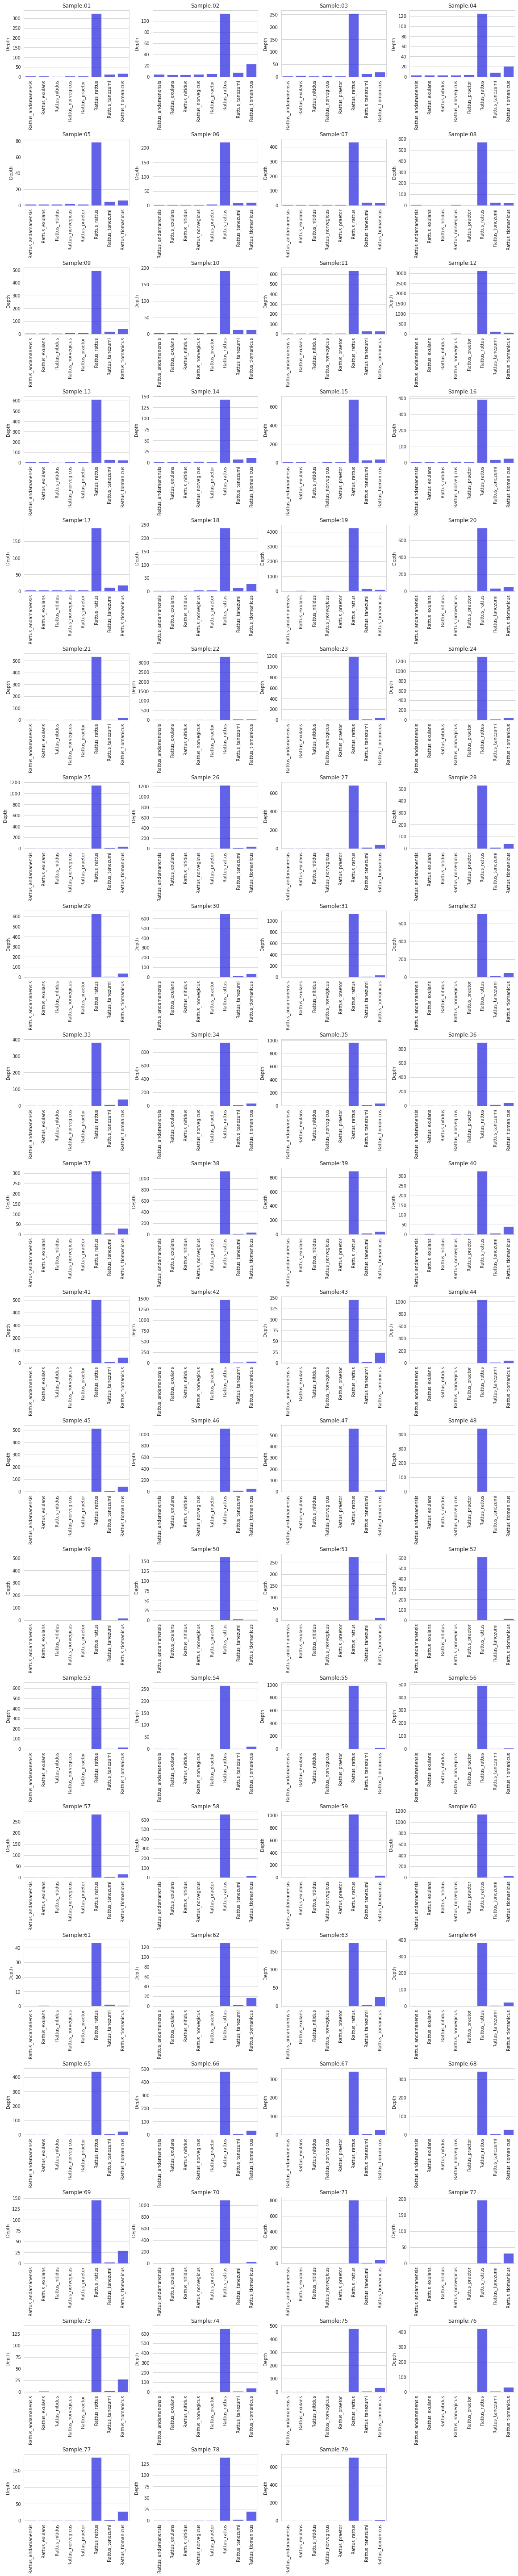

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import numpy as np

wd="/nesi/nobackup/uoo03627/qt_rat_sequencing/RRATTUS_ALL_SI/results/03_mitogenome/mosdepth"

# Set seaborn style
sns.set_style("whitegrid")

# Find all mosdepth summary files (assuming they follow the pattern '01-79.mosdepth.summary.txt')
summary_files = sorted(glob.glob("*_mito_mosdepth.mosdepth.summary.txt"))

# Define figure layout
samples_per_row = 4
num_samples = len(summary_files)
nrows = (num_samples + samples_per_row - 1) // samples_per_row  # Compute number of rows

fig, axes = plt.subplots(nrows=nrows, ncols=samples_per_row, figsize=(samples_per_row * 4, nrows * 4), constrained_layout=True)
axes = axes.flatten()  # Flatten in case of a single row

# Process each file
for idx, file in enumerate(summary_files):
    sample_name = file.split("_")[0]  # Extract sample name from filename
    df = pd.read_csv(file, sep="\t", header=0)
    df_filtered = df[~df["chrom"].str.contains("region")]
    df_filtered = df_filtered.copy()
    
    name_edits = {
     'MK558274.1_Rattus_andamanensis_mitochondrion': 'Rattus_andamanensis',
     'KY814709.1_Rattus_exulans_mitochondrion': 'Rattus_exulans',
     'KX058347.1_Rattus_nitidus_mitochondrion': 'Rattus_nitidus',
     'AJ428514.1_Rattus_norvegicus_wild-caught_Copenhagen_Denmark': 'Rattus_norvegicus',
     'NC_012461.1_Rattus_praetor_mitochondrion': 'Rattus_praetor',
     'NC_012374.1_Rattus_rattus_mitochondrion': 'Rattus_rattus',
     'NC_011638.1_Rattus_tanezumi_mitochondrion': 'Rattus_tanezumi',
     'NC_029888.1_Rattus_tiomanicus_isolate_RT1_mitochondrion': 'Rattus_tiomanicus'
     }
    df_filtered['chrom'] = df_filtered['chrom'].map(name_edits)
    
    # Create histogram of mean coverage per chromosome
    sns.barplot(ax=axes[idx], x="chrom", y="mean", data=df_filtered, color="blue", alpha=0.7)
    
    # Labeling
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Depth")
    axes[idx].set_title(f"Sample:{sample_name}")
    axes[idx].tick_params(axis='x', rotation=90)

# Hide unused subplots if necessary
for ax in axes[num_samples:]:
    ax.set_visible(False)

    # Save the plot
plt.savefig("Mitogenome_coverage_hist_mosdepth.png", dpi=fig.dpi)
# Show the final figure
plt.show()
plt.close() 